<a href="https://colab.research.google.com/github/danielduartt/Pandas-Python/blob/main/Ordenacao_DataFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Método Apply e Ordenação de DataFrames**
- apply
- sort_value

###Apply

In [47]:
import pandas as pd
import numpy as np

In [48]:
df = pd.read_csv("/content/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df['Age'].apply(np.sqrt) #aplicou a função de raiz quadrada sobre cada elemento da coluna

0      4.690416
1      6.164414
2      5.099020
3      5.916080
4      5.916080
         ...   
886    5.196152
887    4.358899
888         NaN
889    5.099020
890    5.656854
Name: Age, Length: 891, dtype: float64

In [50]:
def changeSurvived(elemento):
  if elemento == 0:
    return "No"
  else:
    return "Yes"

df['Survived'] = df['Survived'].apply(changeSurvived)#mandando a alteração pro df
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df['Fare'].dtype

dtype('float64')

In [52]:
def changeFare(elemento):
  elemento = str(elemento).strip()
  if elemento[0] != '$':
    return f"${str(elemento)}"
  else:
    return f"{str(elemento)}"

df['Fare'] = df['Fare'].apply(changeFare)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


###Ordenação

In [53]:
df.sort_values(by = "Age", inplace = True) #Ordenando por Idade
'''
parametros:
ascendind = True => ordena em forma crescente/ False para decrescente
inplace = False (padrão)
'''
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,Yes,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,$8.5167,NaN,C
755,756,Yes,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,$14.5,NaN,S
644,645,Yes,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,$19.2583,NaN,C
469,470,Yes,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,$19.2583,NaN,C
78,79,Yes,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,$29.0,NaN,S


In [54]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [55]:
df.loc[df['Age'] < 1, "Age"] = df['Age'].mean()

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,Yes,3,"Thomas, Master. Assad Alexander",male,29.699118,0,1,2625,$8.5167,NaN,C
755,756,Yes,2,"Hamalainen, Master. Viljo",male,29.699118,1,1,250649,$14.5,NaN,S
644,645,Yes,3,"Baclini, Miss. Eugenie",female,29.699118,2,1,2666,$19.2583,NaN,C
469,470,Yes,3,"Baclini, Miss. Helene Barbara",female,29.699118,2,1,2666,$19.2583,NaN,C
78,79,Yes,2,"Caldwell, Master. Alden Gates",male,29.699118,0,2,248738,$29.0,NaN,S


<Axes: xlabel='Sex,Survived'>

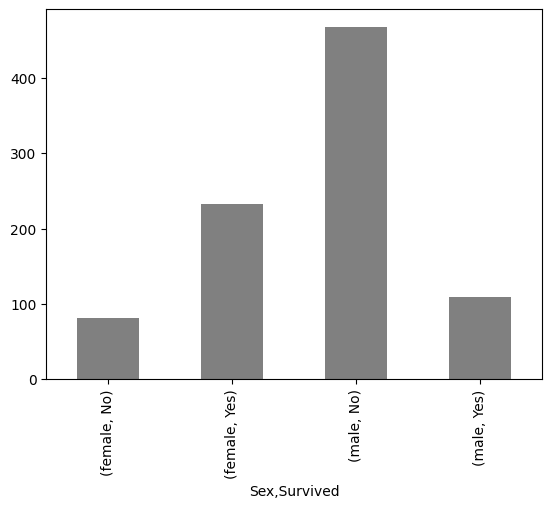

In [60]:
agrupados = df.groupby(['Sex', 'Survived']).size()
agrupados.plot.bar(color = 'gray')